#  Diabetes 130 US hospitals for years 1999-2008 (Diabetes - readmission)

## Data Preprocessing

**In this part, I will perform preprocessing of features in following steps:**
1. Fill null values ('?' in this case) of feature with less than 50% of data missing.
2. Map IDs of admission, discharge, primary and secondary diagnosis to their respective text description.
3. Drop some features
4. create few new features
5. In target column ('readmitted'),map {<30} to 1 and {>30,NO} to 0 which will make it a binary classification problem.
6. Deal with imabalancy
7. Drop duplicate rows
8. Split the data into test, train, cv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [3]:
df_id = pd.read_csv('dataset_diabetes/IDs_mapping.csv')
df_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


### 'age'

In [4]:
def med_range(x):
    x = x.replace('[','')
    x = x.replace(')','')
    l = x.split('-')
    a = (int(l[0]) + int(l[1]))/2
    return a
    
df['age'] = df['age'].apply(med_range)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Imputations of missing values

### 'race

In [6]:
len(df[df['race']=='?'])

2273

*we will impute the most frequent values proportion wise.*

In [7]:
print('Caucasian will be imputed for:', int(2273*0.75))
print('AfricanAmerican will be imputed for:', int(2273*0.19))
print('Hispanic will be imputed for:', int(2273*0.02))


Caucasian will be imputed for: 1704
AfricanAmerican will be imputed for: 431
Hispanic will be imputed for: 45


In [8]:
d1 = df[df['race']=='?']['race'].sample(1704)
for i in d1.index:
    df['race'].iloc[i] = 'Caucasian'

d2 = df[df['race']=='?']['race'].sample(431)
for i in d2.index:
    df['race'].iloc[i] = 'AfricanAmerican'
    
df['race'] = df['race'].apply(lambda x:'Hispanic'if x=='?' else x)

D:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
len(df[df['race']=='?'])

0

### 'diag_1', 'diag_2', 'diag_3'

In [10]:
import os

In [11]:
#creating a dataframe with ICD9 codes and their desription:
txt_file = open('dataset_diabetes/ICD9.txt', "r")
csv_file = open('dataset_diabetes/ICD_final.csv', 'w+')
csv_file.write("CODE, DESCRIPTION")
csv_file.write("\n")
for line in txt_file:
    lst = line.split(' ')
    description = ''
    for i in range(1,len(lst)):
        description += lst[i] + ' '
    description = description.replace(',','')
    csv_file.write(str(lst[0]) + "," + description)
    csv_file.write('\n')
csv_file.close()
txt_file.close()
    
    

In [12]:
df_icd = pd.read_csv('dataset_diabetes/ICD_final.csv')
df_icd.head()

,CODE,DESCRIPTION
0,001,Cholera
1,002,Typhoid and paratyphoid fevers
2,003,Other salmonella infections
3,004,Shigellosis
4,005,Other food poisoning (bacterial)


In [13]:
#removing all the NaN entries and leading '0's in ICD9 codes column.
df_icd = df_icd.dropna()
df_icd['CODE'] = df_icd['CODE'].apply(lambda x: x.lstrip('0'))
df_icd

,CODE,DESCRIPTION
0,1,Cholera
1,2,Typhoid and paratyphoid fevers
2,3,Other salmonella infections
3,4,Shigellosis
4,5,Other food poisoning (bacterial)
...,...,...
1203,E995,Injury due to war operations by other and unsp...
1204,E996,Injury due to war operations by nuclear weapons
1205,E997,Injury due to war operations by other forms of...
1206,E998,Injury due to war operations but occurring aft...


In [14]:
df = df.merge(df_icd, how='left', left_on = 'diag_1', right_on = 'CODE')
df = df.merge(df_icd, how='left', left_on = 'diag_2', right_on = 'CODE')
df = df.merge(df_icd, how='left', left_on = 'diag_3', right_on = 'CODE')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-pioglitazone,change,diabetesMed,readmitted,CODE_x,DESCRIPTION_x,CODE_y,DESCRIPTION_y,CODE,DESCRIPTION
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,NO,250.83,Diabetes with other specified manifestations t...,NaN,NaN,NaN,NaN
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,Ch,Yes,>30,276,Disorders of fluid electrolyte and acid-base b...,250.01,Diabetes mellitus without mention of complicat...,255,Disorders of adrenal glands
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,Yes,NO,648,Other current conditions in the mother classif...,NaN,NaN,V27,Outcome of delivery
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,Ch,Yes,NO,8,Intestinal infections due to other organisms,250.43,Diabetes with renal manifestations type I [juv...,403,Hypertensive chronic kidney disease
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,Ch,Yes,NO,197,Secondary malignant neoplasm of respiratory an...,157,Malignant neoplasm of pancreas,NaN,NaN


In [15]:
df = df.rename({' DESCRIPTION_x':'diag_1_des',' DESCRIPTION_y':'diag_2_des',' DESCRIPTION':'diag_3_des' }, axis='columns')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-pioglitazone,change,diabetesMed,readmitted,CODE_x,diag_1_des,CODE_y,diag_2_des,CODE,diag_3_des
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,NO,250.83,Diabetes with other specified manifestations t...,NaN,NaN,NaN,NaN
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,Ch,Yes,>30,276,Disorders of fluid electrolyte and acid-base b...,250.01,Diabetes mellitus without mention of complicat...,255,Disorders of adrenal glands
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,Yes,NO,648,Other current conditions in the mother classif...,NaN,NaN,V27,Outcome of delivery
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,Ch,Yes,NO,8,Intestinal infections due to other organisms,250.43,Diabetes with renal manifestations type I [juv...,403,Hypertensive chronic kidney disease
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,Ch,Yes,NO,197,Secondary malignant neoplasm of respiratory an...,157,Malignant neoplasm of pancreas,NaN,NaN


In [16]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [17]:
df = df.drop(['CODE_x','CODE_y','CODE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null float64
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            1017

***So here we have created three more text columns which contains the textual description of ICD9 codes in diag_1, diag_2 and diag_2. But there are some missing values in these three columns.***

In [18]:
df[df['diag_1_des'].isnull()]['diag_1']

10        250.7
52        250.6
56        250.7
60        250.4
65        250.7
          ...  
101712      280
101713    250.1
101731      250
101742    250.8
101753    250.8
Name: diag_1, Length: 5822, dtype: object

In [19]:
null_idx_1 = df[df['diag_1_des'].isnull()]['diag_1'].index
for i in null_idx_1:
    df['diag_1_des'].iloc[i] = 'diabetes mellitus'

null_idx_2 = df[df['diag_2_des'].isnull()]['diag_2'].index
for i in null_idx_2:
    df['diag_2_des'].iloc[i] = 'diabetes mellitus'
    
null_idx_3 = df[df['diag_3_des'].isnull()]['diag_3'].index
for i in null_idx_3:
    df['diag_3_des'].iloc[i] = 'diabetes mellitus'


D:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 'discharge_disposition_id'

In [20]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [21]:
txt_file = open('dataset_diabetes/discharge.txt', "r")
csv_file = open('dataset_diabetes/discharge_final.csv', 'w+')
csv_file.write("ID, DESCRIPTION")
csv_file.write("\n")
for line in txt_file:
    lst = line.split(' ')
    description = ''
    for i in range(1,len(lst)):
        description += lst[i] + ' '
    description = description.replace(',','')
    csv_file.write(str(lst[0]) + "," + description)
    csv_file.write('\n')
csv_file.close()
txt_file.close()
    

In [22]:
df_disch = pd.read_csv('dataset_diabetes/discharge_final.csv')
df_disch.head()

,ID,DESCRIPTION
0,1,Discharged to home/self care (routine charge).
1,2,Discharged/transferred to other short term gen...
2,3,Discharged/transferred to skilled nursing faci...
3,4,Discharged/transferred to intermediate care fa...
4,5,Discharged/transferred to another type of inst...


In [23]:
df = df.merge(df_disch, how='left', left_on='discharge_disposition_id', right_on='ID')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,ID,DESCRIPTION
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,NaN,NaN
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,1.0,Discharged to home/self care (routine charge).
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,1.0,Discharged to home/self care (routine charge).
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,1.0,Discharged to home/self care (routine charge).
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,1.0,Discharged to home/self care (routine charge).


In [24]:
df = df.drop(['ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 54 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null float64
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            1017

In [25]:
df = df.rename({' DESCRIPTION':'disch_description'}, axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 54 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null float64
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            1017

In [26]:
from tqdm import tqdm

In [27]:
for i in tqdm(range(len(df))):
    if (df['discharge_disposition_id'].iloc[i] < 20) and  (df['discharge_disposition_id'].iloc[i] > 9):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'
    if (df['discharge_disposition_id'].iloc[i] < 30) and  (df['discharge_disposition_id'].iloc[i] >= 21):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'    
    if (df['discharge_disposition_id'].iloc[i] < 40) and  (df['discharge_disposition_id'].iloc[i] >= 31):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'  
    if (df['discharge_disposition_id'].iloc[i] < 50) and  (df['discharge_disposition_id'].iloc[i] >= 44):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'     
    if (df['discharge_disposition_id'].iloc[i] < 60) and  (df['discharge_disposition_id'].iloc[i] >= 52):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'
    if (df['discharge_disposition_id'].iloc[i] < 70) and  (df['discharge_disposition_id'].iloc[i] >= 67):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'
    if (df['discharge_disposition_id'].iloc[i] < 100) and  (df['discharge_disposition_id'].iloc[i] >= 71):
        df['disch_description'].iloc[i] = 'Reserved for National Assignment'
df.info()

  0%|                                                                                       | 0/101766 [00:00<?, ?it/s]D:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|████████████████████████████████████████████████████████████████████████| 101766/101766 [01:04<00:00, 1570.61it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 54 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null float64
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            1017

In [28]:
df[df['disch_description'].isnull()]['discharge_disposition_id']

Series([], Name: discharge_disposition_id, dtype: int64)

In [29]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [30]:
# https://stackoverflow.com/a/47091490/4084039
import re
from tqdm import tqdm
def text_preprocess(phrase):
    preprocessed_text = []

    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = phrase.replace('(','')
    phrase = phrase.replace(')' ,'')
    phrase = phrase.replace('.' ,'')                            
    phrase = phrase.replace('-' ,'')
    phrase = phrase.replace(':' ,'')  
    phrase = phrase.replace('/',' ')
    phrase = phrase.replace('[',' ')
    phrase = phrase.replace(']',' ')
                            

    phrase = ' '.join(e.lower() for e in phrase.split() if e.lower() not in stopwords)

    preprocessed_text.append(phrase.lower().strip())
    return phrase



In [31]:
df['disch_description'] = df['disch_description'].apply(text_preprocess)
df['disch_description']

0                              reserved national assignment
1                  discharged home self care routine charge
2                  discharged home self care routine charge
3                  discharged home self care routine charge
4                  discharged home self care routine charge
                                ...                        
101761    discharged transferred skilled nursing facilit...
101762    discharged transferred intermediate care facil...
101763             discharged home self care routine charge
101764    discharged transferred skilled nursing facilit...
101765             discharged home self care routine charge
Name: disch_description, Length: 101766, dtype: object

In [32]:
str(df.iloc[0]['disch_description']).split()

['reserved', 'national', 'assignment']

In [33]:
df[df['discharge_disposition_id']==42]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description


In [34]:
idx = []
for i in tqdm(range(len(df))):
  
    if ('Expired' in str(df['disch_description'][i])) or ('expired' in str(df['disch_description'][i])):
        idx.append(i)


100%|███████████████████████████████████████████████████████████████████████| 101766/101766 [00:03<00:00, 28840.37it/s]


In [35]:
df = df.drop(idx)
len(df)

101764

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101764 entries, 0 to 101765
Data columns (total 54 columns):
encounter_id                101764 non-null int64
patient_nbr                 101764 non-null int64
race                        101764 non-null object
gender                      101764 non-null object
age                         101764 non-null float64
weight                      101764 non-null object
admission_type_id           101764 non-null int64
discharge_disposition_id    101764 non-null int64
admission_source_id         101764 non-null int64
time_in_hospital            101764 non-null int64
payer_code                  101764 non-null object
medical_specialty           101764 non-null object
num_lab_procedures          101764 non-null int64
num_procedures              101764 non-null int64
num_medications             101764 non-null int64
number_outpatient           101764 non-null int64
number_emergency            101764 non-null int64
number_inpatient            1017

## 'admission_source_id'

In [36]:
df_adm_id = pd.read_csv('dataset_diabetes/amd_id.csv')
df_adm_id.head()

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [37]:
df_adm_id.isnull().sum()

admission_source_id    0
description            1
dtype: int64

In [38]:
df_adm_id = df_adm_id.dropna()
df_adm_id.isnull().sum()

admission_source_id    0
description            0
dtype: int64

In [39]:
type(df_adm_id['admission_source_id'][0])

numpy.int64

In [40]:
df['admission_source_id']

0         1
1         7
2         7
3         7
4         7
         ..
101761    7
101762    5
101763    7
101764    7
101765    7
Name: admission_source_id, Length: 101764, dtype: int64

In [41]:
df = df.merge(df_adm_id, how='left', left_on = 'admission_source_id', right_on='admission_source_id')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,description
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room


In [42]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,description
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room


In [43]:
df = df.rename({'description':'admit_description'}, axis='columns')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description
0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,1,...,No,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral
1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,3,...,No,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room
2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,2,...,No,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room
3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,2,...,No,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room
4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,1,...,No,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101764 entries, 0 to 101763
Data columns (total 56 columns):
encounter_id                101764 non-null int64
patient_nbr                 101764 non-null int64
race                        101764 non-null object
gender                      101764 non-null object
age                         101764 non-null float64
weight                      101764 non-null object
admission_type_id           101764 non-null int64
discharge_disposition_id    101764 non-null int64
admission_source_id_x       101764 non-null int64
time_in_hospital            101764 non-null int64
payer_code                  101764 non-null object
medical_specialty           101764 non-null object
num_lab_procedures          101764 non-null int64
num_procedures              101764 non-null int64
num_medications             101764 non-null int64
number_outpatient           101764 non-null int64
number_emergency            101764 non-null int64
number_inpatient            1017

# Dataset-2 (Preprocessed)

In [44]:
df.to_csv('preprocessed_1.csv')

In [45]:
df = pd.read_csv('preprocessed_1.csv')

In [46]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description
0,0,2278392,8222157,Caucasian,Female,5.0,?,6,25,1,...,No,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral
1,1,149190,55629189,Caucasian,Female,15.0,?,1,1,7,...,No,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room
2,2,64410,86047875,AfricanAmerican,Female,25.0,?,1,1,7,...,No,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room
3,3,500364,82442376,Caucasian,Male,35.0,?,1,1,7,...,No,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room
4,4,16680,42519267,Caucasian,Male,45.0,?,1,1,7,...,No,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room


**Simply drop weights because most values are '?'**

In [47]:
df = df.drop(['weight'], axis=1)

#### We will drop 'payer_code' and  'medical_speciality' too because they have more than 50% missing data.

In [48]:
df = df.drop(['payer_code','medical_specialty'], axis=1)

In [68]:
df = df.drop(['diag_1','diag_2','diag_3'], axis=1)

#### We will also drop diag_1, diag_2, diag_3 as we have already their textual description. 

In [49]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_des', 'diag_2_des', 'diag_3_des', 'disch_description',
       'admit_description'],
      dtype='object')

## New features

### procedure_per_med = ( 'num_lab_procedures' + 'num_procedures' )/ 'num_medications'
      

In [53]:
df['procedure_per_med'] = (df['num_lab_procedures'] + df[ 'num_procedures'])/df['num_medications']
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description,procedure_per_med
0,0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,...,No,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral,41.000000
1,1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,...,No,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room,3.277778
2,2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,...,No,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room,1.230769
3,3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,...,No,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room,2.812500
4,4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,...,No,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room,6.375000


### num_med_up = count of medicine whose dosage were upgraded

In [54]:
def count_dosage_up():
    meds = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
    count_col = []
    for i in tqdm(range(len(df))):
        count = 0
        for med in meds:
            if df[med].iloc[i] == 'Up':
                count += 1
        count_col.append(count)
    return count_col


In [55]:
df['num_med_up'] = count_dosage_up()

100%|████████████████████████████████████████████████████████████████████████| 101764/101764 [00:42<00:00, 2418.74it/s]


In [56]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,change,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description,procedure_per_med,num_med_up
0,0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,...,No,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral,41.000000,0
1,1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,...,Ch,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room,3.277778,1
2,2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,...,No,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room,1.230769,0
3,3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,...,Ch,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room,2.812500,1
4,4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,...,Ch,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room,6.375000,0


### num_med_used = total med - meds which were not prescribed = (23 - meds with 'NO' tag)

In [57]:
def count_meds_used():
    meds = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
    count_col = []
    for i in tqdm(range(len(df))):
        count = 0
        for med in meds:
            if df[med].iloc[i] == 'No':
                count += 1
        count_col.append(23 - count)
    return count_col
df['num_med_used'] = count_meds_used()

In [58]:
df['num_med_used'] = count_meds_used()

100%|████████████████████████████████████████████████████████████████████████| 101764/101764 [00:43<00:00, 2357.48it/s]


In [59]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diabetesMed,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description,procedure_per_med,num_med_up,num_med_used
0,0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,...,No,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral,41.000000,0,0
1,1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,...,Yes,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room,3.277778,1,1
2,2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,...,Yes,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room,1.230769,0,1
3,3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,...,Yes,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room,2.812500,1,1
4,4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,...,Yes,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room,6.375000,0,2


### count_encounter = Number of encounters of each patient

In [60]:
df['encounter_id'].nunique()

101764

In [61]:
df['patient_nbr'].nunique()

71517

In [62]:
df_pat_nb = pd.DataFrame(df['patient_nbr'].value_counts())
df_pat_nb.head()

,patient_nbr
88785891,40
43140906,28
1660293,23
88227540,23
23199021,23


In [63]:
df_pat_nb = df_pat_nb.reset_index()


In [64]:
df_pat_nb = df_pat_nb.rename({'index':'patient_nbr', 'patient_nbr':'count_encounter'}, axis = 'columns')
df_pat_nb.head()

,patient_nbr,count_encounter
0,88785891,40
1,43140906,28
2,1660293,23
3,88227540,23
4,23199021,23


In [65]:
df_pat_nb.to_csv('encounters.csv')

In [66]:
df = df.merge(df_pat_nb,how= 'left', left_on='patient_nbr', right_on='patient_nbr' )
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description,procedure_per_med,num_med_up,num_med_used,count_encounter
0,0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,...,NO,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,reserved national assignment,Physician Referral,41.000000,0,0,1
1,1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,...,>30,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,discharged home self care routine charge,Emergency Room,3.277778,1,1,1
2,2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,...,NO,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,discharged home self care routine charge,Emergency Room,1.230769,0,1,1
3,3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,...,NO,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,discharged home self care routine charge,Emergency Room,2.812500,1,1,1
4,4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,...,NO,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,discharged home self care routine charge,Emergency Room,6.375000,0,2,1


In [69]:
df.to_csv('preprocessed_2.csv')

# Dataset-3 (Preprocessed 2)

#### 'readmitted' column redefine

In [3]:
df = pd.read_csv('preprocessed_2.csv')

In [4]:
def label(x):
    if x=='NO' or x=='>30':
        return 0
    elif x=='<30':
        return 1
df['readmitted'] = df['readmitted'].apply(label)

In [5]:
df['readmitted'].value_counts()

0    90407
1    11357
Name: readmitted, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'encounter_id', 'patient_nbr', 'race',
       'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_des', 'diag_2_des', 'diag_3_des', 'disch_description',
       'admit_description', 'procedure_per_med', 'num_med_up', 'num_med_us

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,...,readmitted,diag_1_des,diag_2_des,diag_3_des,disch_description,admit_description,procedure_per_med,num_med_up,num_med_used,count_encounter
0,0,0,2278392,8222157,Caucasian,Female,5.0,6,25,1,...,0,Diabetes with other specified manifestations t...,diabetes mellitus,diabetes mellitus,Reserved National Assignment,Physician Referral,41.000000,0,0,1
1,1,1,149190,55629189,Caucasian,Female,15.0,1,1,7,...,0,Disorders of fluid electrolyte and acid-base b...,Diabetes mellitus without mention of complicat...,Disorders of adrenal glands,Discharged home self care routine charge,Emergency Room,3.277778,1,1,1
2,2,2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,...,0,Other current conditions in the mother classif...,diabetes mellitus,Outcome of delivery,Discharged home self care routine charge,Emergency Room,1.230769,0,1,1
3,3,3,500364,82442376,Caucasian,Male,35.0,1,1,7,...,0,Intestinal infections due to other organisms,Diabetes with renal manifestations type I [juv...,Hypertensive chronic kidney disease,Discharged home self care routine charge,Emergency Room,2.812500,1,1,1
4,4,4,16680,42519267,Caucasian,Male,45.0,1,1,7,...,0,Secondary malignant neoplasm of respiratory an...,Malignant neoplasm of pancreas,diabetes mellitus,Discharged home self care routine charge,Emergency Room,6.375000,0,2,1


### Encoding Categorical features
***'gender','race', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','change', 'diabetesMed'    ***

In [96]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
df_dum = pd.get_dummies(df, columns=['gender','race', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                                     'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                                     'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
                                     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
                                     'change', 'diabetesMed','change', 'diabetesMed' ])


In [9]:
df_dum.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'encounter_id', 'patient_nbr', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures',
       ...
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=121)

### Encoding Text Features

***'diag_1_des', 'diag_2_des', 'diag_3_des', 'disch_description','admit_description'***

In [10]:
df_dum.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,0,0,2278392,8222157,5.0,6,25,1,1,41,...,1,0,0,1,1,0,0,1,1,0
1,1,1,149190,55629189,15.0,1,1,7,3,59,...,1,0,1,0,0,1,1,0,0,1
2,2,2,64410,86047875,25.0,1,1,7,2,11,...,1,0,0,1,0,1,0,1,0,1
3,3,3,500364,82442376,35.0,1,1,7,2,44,...,1,0,1,0,0,1,1,0,0,1
4,4,4,16680,42519267,45.0,1,1,7,1,51,...,1,0,1,0,0,1,1,0,0,1


#### Combining all the text features together:

In [12]:
df_dum['text'] = df_dum['diag_1_des'].map(str)+ ' ' +df_dum['diag_2_des'].map(str)+ ' ' + df_dum['diag_3_des'].map(str)+ ' ' +df_dum['disch_description'].map(str)+ ' ' +df_dum[ 'admit_description'].map(str)

In [13]:
df_dum.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,text
0,0,0,2278392,8222157,5.0,6,25,1,1,41,...,0,0,1,1,0,0,1,1,0,Diabetes with other specified manifestations t...
1,1,1,149190,55629189,15.0,1,1,7,3,59,...,0,1,0,0,1,1,0,0,1,Disorders of fluid electrolyte and acid-base b...
2,2,2,64410,86047875,25.0,1,1,7,2,11,...,0,0,1,0,1,0,1,0,1,Other current conditions in the mother classif...
3,3,3,500364,82442376,35.0,1,1,7,2,44,...,0,1,0,0,1,1,0,0,1,Intestinal infections due to other organisms D...
4,4,4,16680,42519267,45.0,1,1,7,1,51,...,0,1,0,0,1,1,0,0,1,Secondary malignant neoplasm of respiratory an...


In [18]:
df_dum['text'] = df_dum['text'].apply(text_preprocess)

In [19]:
df_dum['text'][0]

'diabetes specified manifestations type juvenile type uncontrolled diabetes mellitus diabetes mellitus reserved national assignment physician referral'

In [21]:
df_dum = df_dum.dropna()

In [22]:
df_dum.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
encounter_id       0
patient_nbr        0
age                0
                  ..
change_Ch          0
change_No          0
diabetesMed_No     0
diabetesMed_Yes    0
text               0
Length: 122, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X = df_dum.drop(['Unnamed: 0', 'Unnamed: 0.1', 'encounter_id', 'patient_nbr','readmitted',
                 'diag_1_des', 'diag_2_des', 'diag_3_des', 'disch_description','admit_description' ], axis=1)
y = df_dum['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

#### Now let us remove text for now and apply SMOTE

In [24]:
X_train = X_train.drop('text', axis=1)
X_test = X_test.drop('text', axis=1)

In [25]:
X_train.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
78601,55.0,1,1,7,2,55,0,5,0,0,...,1,0,0,1,1,0,0,1,1,0
61427,55.0,2,6,1,9,30,2,9,0,0,...,1,0,0,1,1,0,0,1,1,0
91350,65.0,3,6,1,4,31,1,15,0,0,...,1,0,0,1,0,1,0,1,0,1
10501,85.0,3,18,1,7,58,1,13,0,0,...,1,0,0,1,0,1,0,1,0,1
61646,85.0,1,3,7,5,67,4,21,0,0,...,1,0,0,1,1,0,0,1,1,0


In [26]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (66488, 111)
y_train dataset:  (66488,)
X_test dataset:  (28496, 111)
y_test dataset:  (28496,)


## Applying SMOTE

In [27]:
#https://www.kaggle.com/qianchao/smote-with-imbalance-data
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train.as_matrix(), y_train.ravel())


print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 7485
Before OverSampling, counts of label '0': 59003 



D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


After SMOTE, the shape of train_X: (118006, 111)
After SMOTE, the shape of train_y: (118006,) 

After SMOTE, counts of label '1': 59003
After SMOTE, counts of label '0': 59003


In [41]:
X_train_res

array([[55.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [55.        ,  2.        ,  6.        , ...,  1.        ,
         1.        ,  0.        ],
       [65.        ,  3.        ,  6.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [75.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [55.        ,  3.        ,  1.        , ...,  0.40992174,
         0.        ,  1.        ],
       [75.        ,  1.        , 18.37146715, ...,  0.09286679,
         0.        ,  1.        ]])

In [29]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [32]:
X_train.columns

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=107)

In [33]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.02333
Feature: 1, Score: 0.03247
Feature: 2, Score: 0.05302
Feature: 3, Score: 0.02810
Feature: 4, Score: 0.02099
Feature: 5, Score: 0.02094
Feature: 6, Score: 0.01928
Feature: 7, Score: 0.01631
Feature: 8, Score: 0.01071
Feature: 9, Score: 0.02499
Feature: 10, Score: 0.10193
Feature: 11, Score: 0.02647
Feature: 12, Score: 0.01383
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01538
Feature: 15, Score: 0.34118
Feature: 16, Score: 0.00962
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.02100
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00696
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01813
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01531
Feature: 30, Score: 0.00786
Feature: 31, Score: 0.01230
Feature: 32, Score: 0.02141
Feature: 33, Score: 0.00840
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

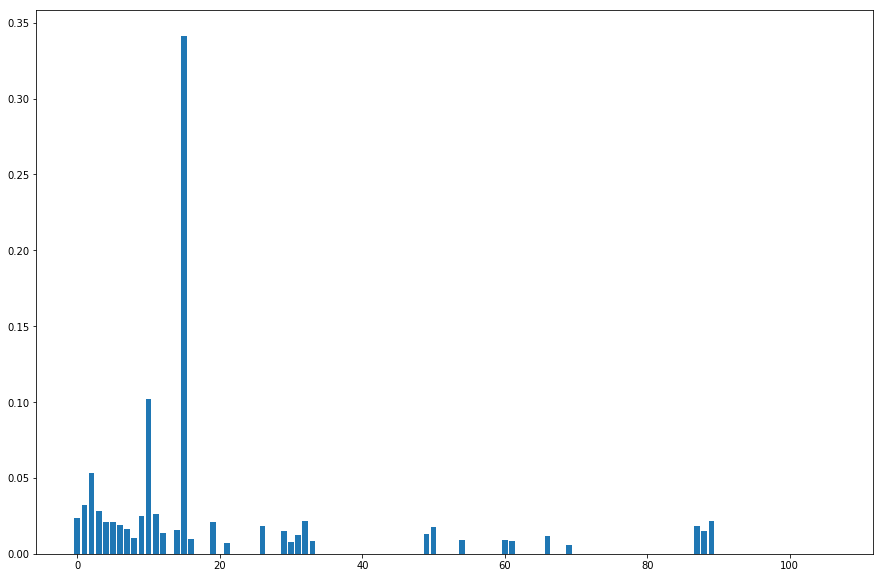

In [34]:
# plot feature importance
fig = plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Observations:
* Majority of the features have zero importance score.
* One feature, count_encounter, has very high importance of 0.34 but others hav very less.
* there are just three features with importance 0.05.

In [36]:
X_train.columns[10]

'number_inpatient'

In [42]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(X_train_res, y_train_res)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00067
Feature: 1, Score: 0.00465
Feature: 2, Score: 0.00878
Feature: 3, Score: 0.00109
Feature: 4, Score: 0.01892
Feature: 5, Score: 0.00025
Feature: 6, Score: 0.01800
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01991
Feature: 9, Score: 0.01086
Feature: 10, Score: 0.02110
Feature: 11, Score: 0.01474
Feature: 12, Score: 0.00050
Feature: 13, Score: 0.05625
Feature: 14, Score: 0.02062
Feature: 15, Score: 0.05576
Feature: 16, Score: 0.10021
Feature: 17, Score: 0.00581
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.07100
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.03384
Feature: 22, Score: 0.00037
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.04294
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.04650
Feature: 34, Score: 0.01485
Feature: 35, Score: 0.00000
Fe

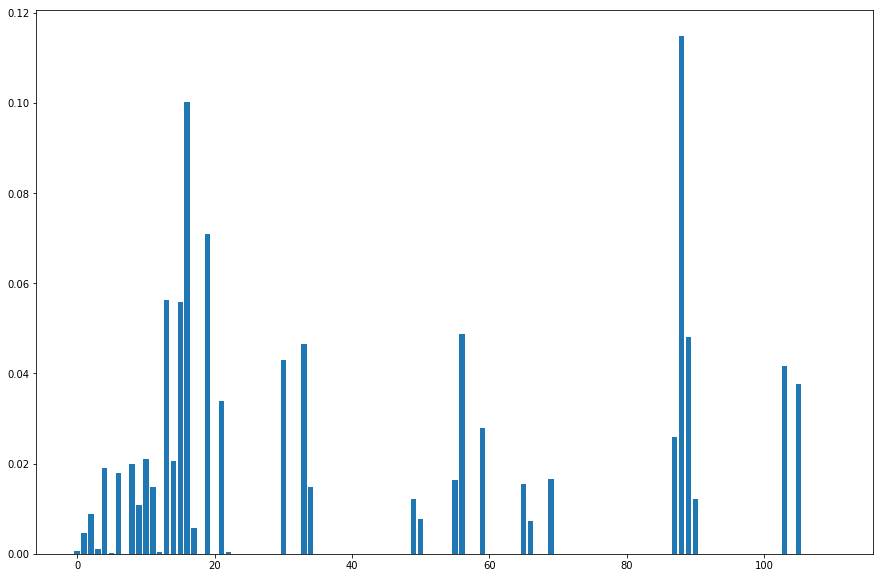

In [43]:
# plot feature importance
fig = plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Observations:
* Feature importance after applying SMOTE changes a lot from that where SMOTE was not applied.
* A lot of features have zero importance.
* Maximum importance seen here is of 0.115.
* There are many features which will not contribute and hence I will remove those features.

In [47]:
feat_selected = []
for i,v in enumerate(importance):
    if v>0.05:
        print(X_train.columns[i])
    if v  > 0:
        feat_selected.append(X_train.columns[i])



num_med_up
count_encounter
gender_Female
race_AfricanAmerican
insulin_No


In [85]:
print('Out of total {} features, {} features have feature  importance  greater than 0.'.format(len(df_dum.columns),len(feat_selected)))

Out of total 123 features, 37 features have feature  importance  greater than 0.


In [86]:
print('Features with positive importance are:',feat_selected)

Features with positive importance are: ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'procedure_per_med', 'num_med_up', 'num_med_used', 'count_encounter', 'gender_Female', 'gender_Male', 'race_AfricanAmerican', 'race_Caucasian', 'race_Hispanic', 'A1Cresult_None', 'metformin_No', 'metformin_Steady', 'glimepiride_No', 'glimepiride_Steady', 'glipizide_No', 'glipizide_Steady', 'glyburide_No', 'pioglitazone_No', 'pioglitazone_Steady', 'rosiglitazone_No', 'insulin_Down', 'insulin_No', 'insulin_Steady', 'insulin_Up', 'change_Ch', 'diabetesMed_No']


Out of total 123 features, 37 features have feature  importance  greater than 0.


# Bivariate Analysis

In [56]:
df_dum.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,text
0,0,0,2278392,8222157,5.0,6,25,1,1,41,...,0,0,1,1,0,0,1,1,0,diabetes specified manifestations type juvenil...
1,1,1,149190,55629189,15.0,1,1,7,3,59,...,0,1,0,0,1,1,0,0,1,disorders fluid electrolyte acidbase balance d...
2,2,2,64410,86047875,25.0,1,1,7,2,11,...,0,0,1,0,1,0,1,0,1,current conditions mother classifiable elsewhe...
3,3,3,500364,82442376,35.0,1,1,7,2,44,...,0,1,0,0,1,1,0,0,1,intestinal infections due organisms diabetes r...
4,4,4,16680,42519267,45.0,1,1,7,1,51,...,0,1,0,0,1,1,0,0,1,secondary malignant neoplasm respiratory diges...


In [69]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'encounter_id', 'patient_nbr', 'race',
       'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_des', 'diag_2_des', 'diag_3_des', 'disch_description',
       'admit_description', 'procedure_per_med', 'num_med_up', 'num_med_us

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


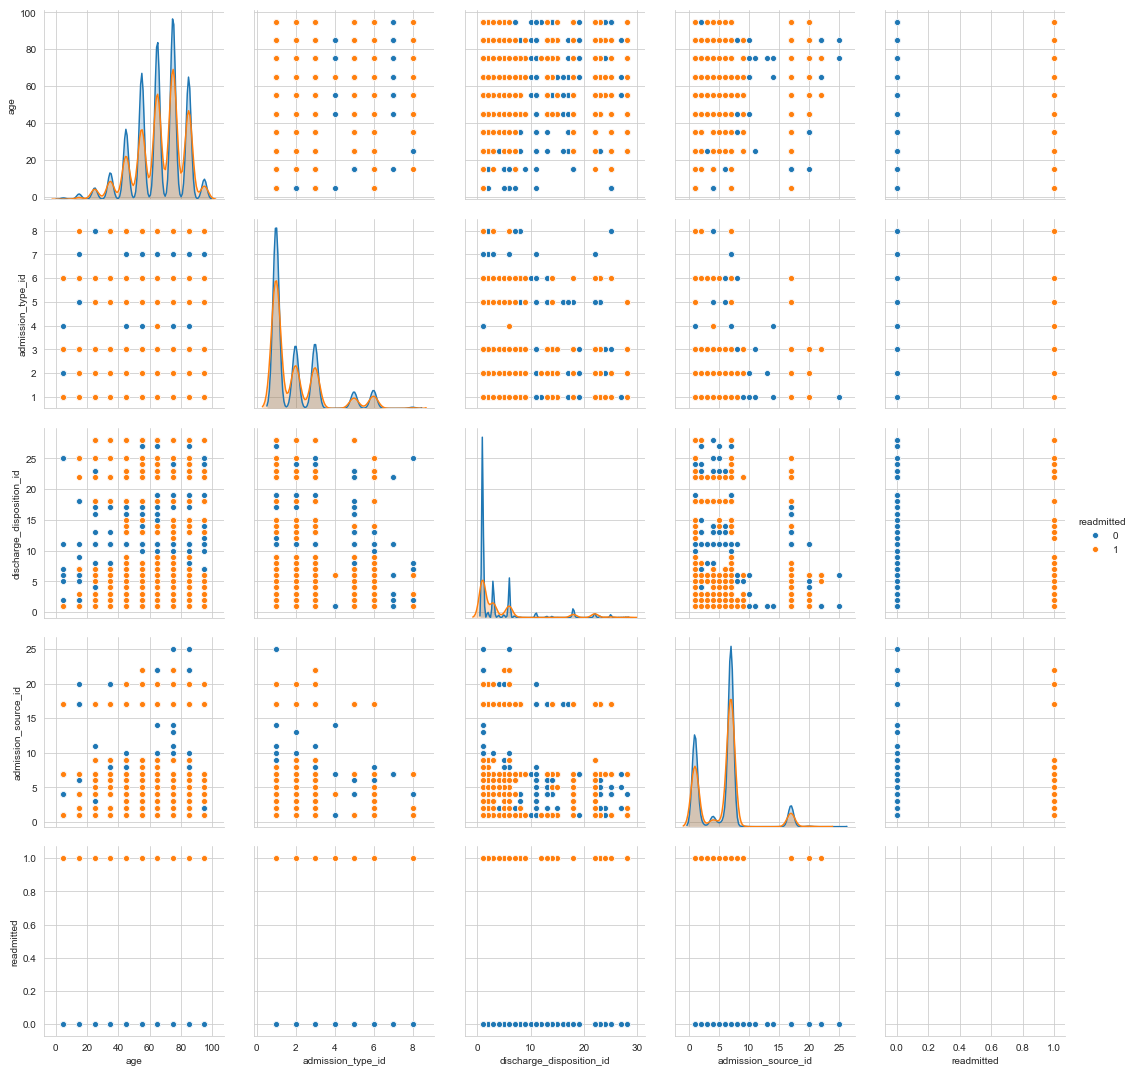

In [63]:
df_1 = df[['age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id','readmitted']]
sns.set_style("whitegrid");
sns.pairplot(df_1, hue="readmitted", size=3);
plt.show()

### Observations:
* Not much help coming from this pairplot.


D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


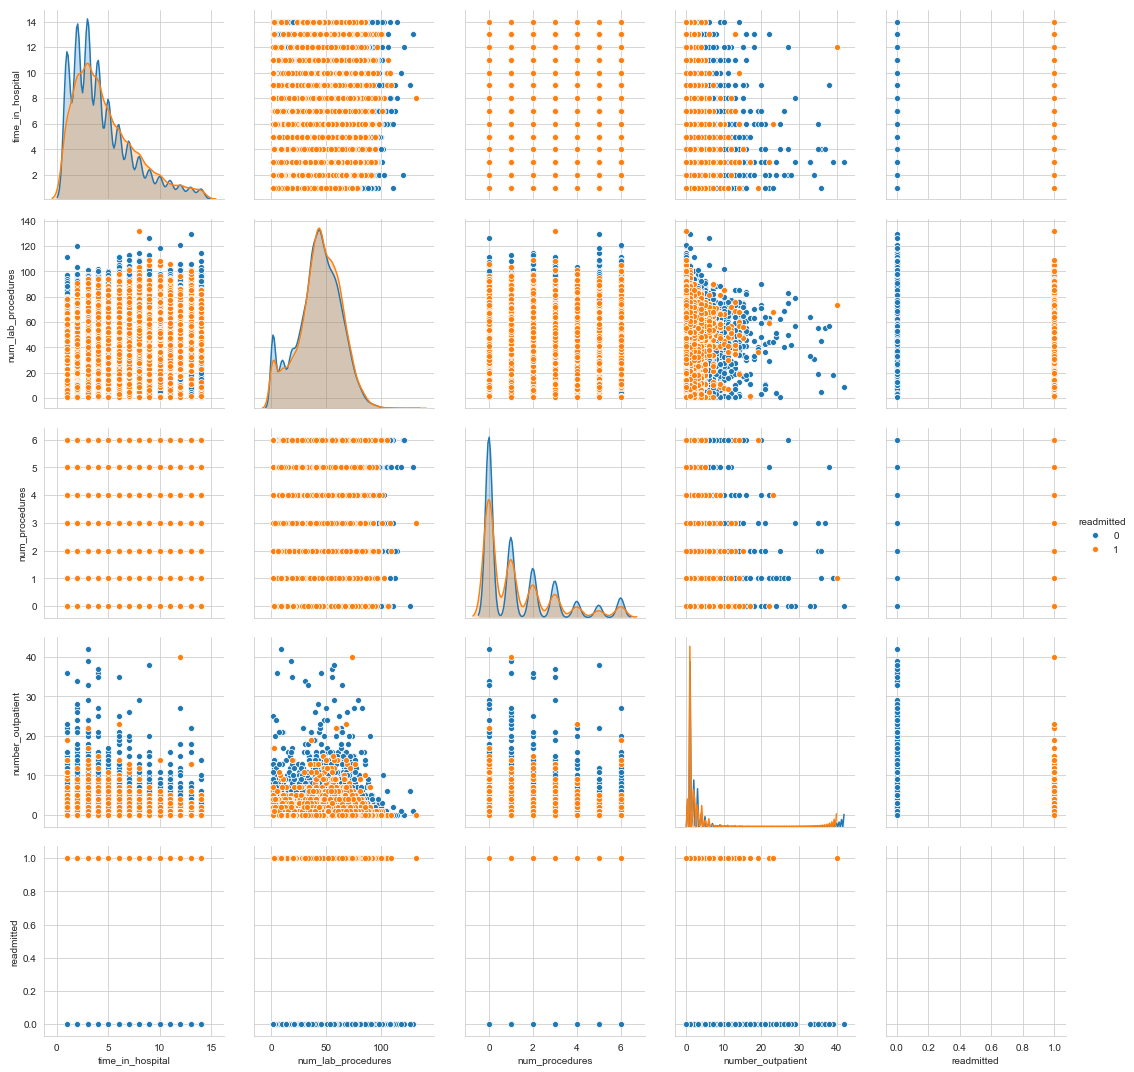

In [65]:
df_1 = df[['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'number_outpatient','readmitted']]
sns.set_style("whitegrid");
sns.pairplot(df_1, hue="readmitted", size=3);
plt.show()

### Observations:
* number_outpatient vs time_in_hospital : I see some sort of sepearation between both classes. Seems like as number_outpatient increases. A line of equation (3y + 2x = 60) seems to seperate both the classes. So I will create a new feature with this equations help.
* num_lab_procedure vs number_outpatient: As the number of outpatient increase the chances of readmittance reduces. There is not a clear seperation but a curvataure seems to seperate the classes.
* num_procedure vs number_outpatient: A line with equation (2x + y =17) seems to seperate a lot of points.

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


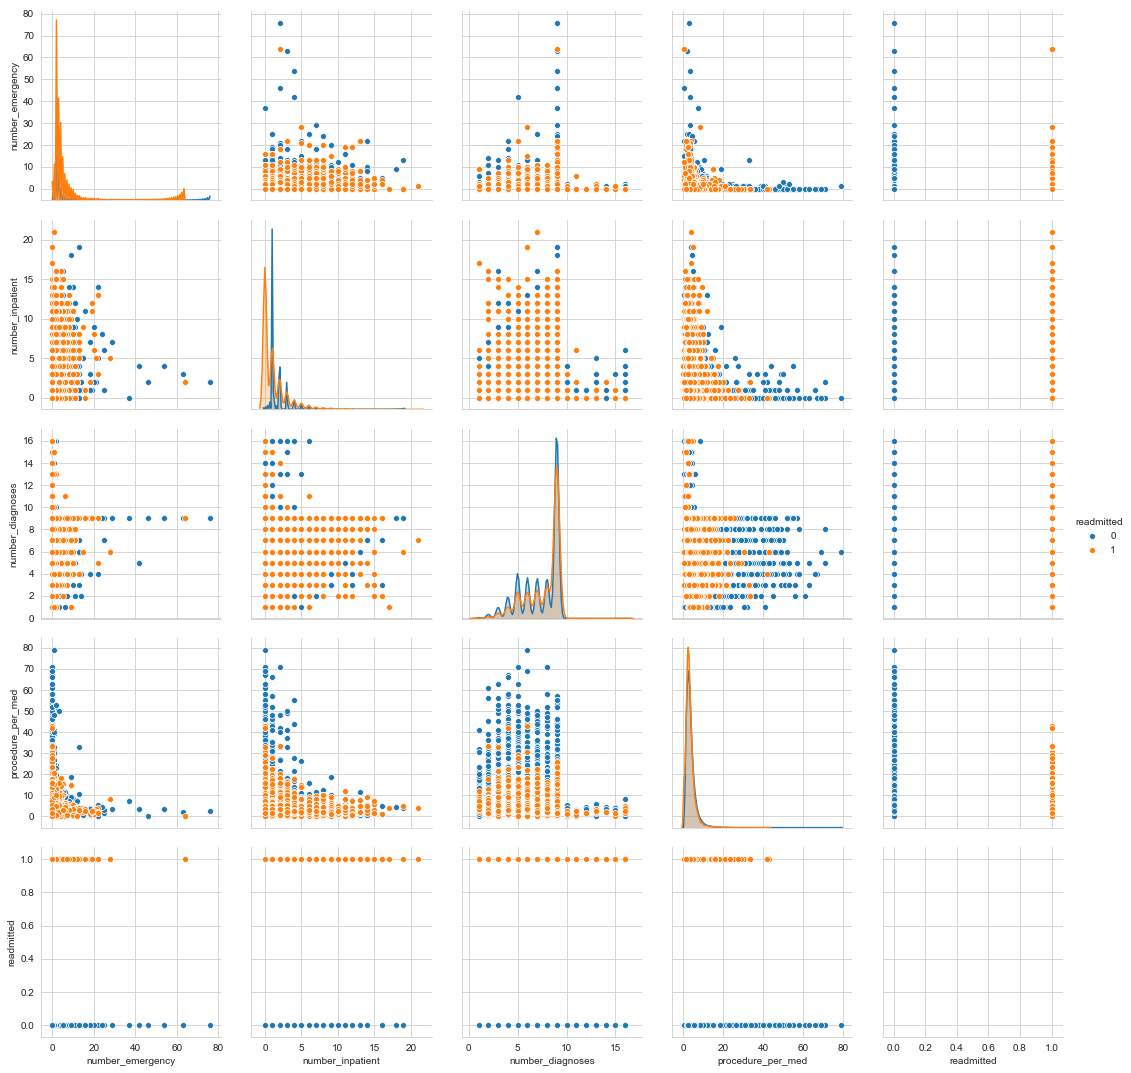

In [66]:
df_1 = df[[ 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'procedure_per_med','readmitted']]
sns.set_style("whitegrid");
sns.pairplot(df_1, hue="readmitted", size=3);
plt.show()

### Observations:
* num_emergency vs procedure_per_med: The equation xy=c seems to seperate many points as the num_emergency and procedure_per_med increases the chances of readmission decreases.
* number_diagnosis vs procedure_per_med: Some sort of curvature seems to seperate the points.
* number_inpatient vs procedure_per_med: More procedure per med means chance of readmission is less.

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


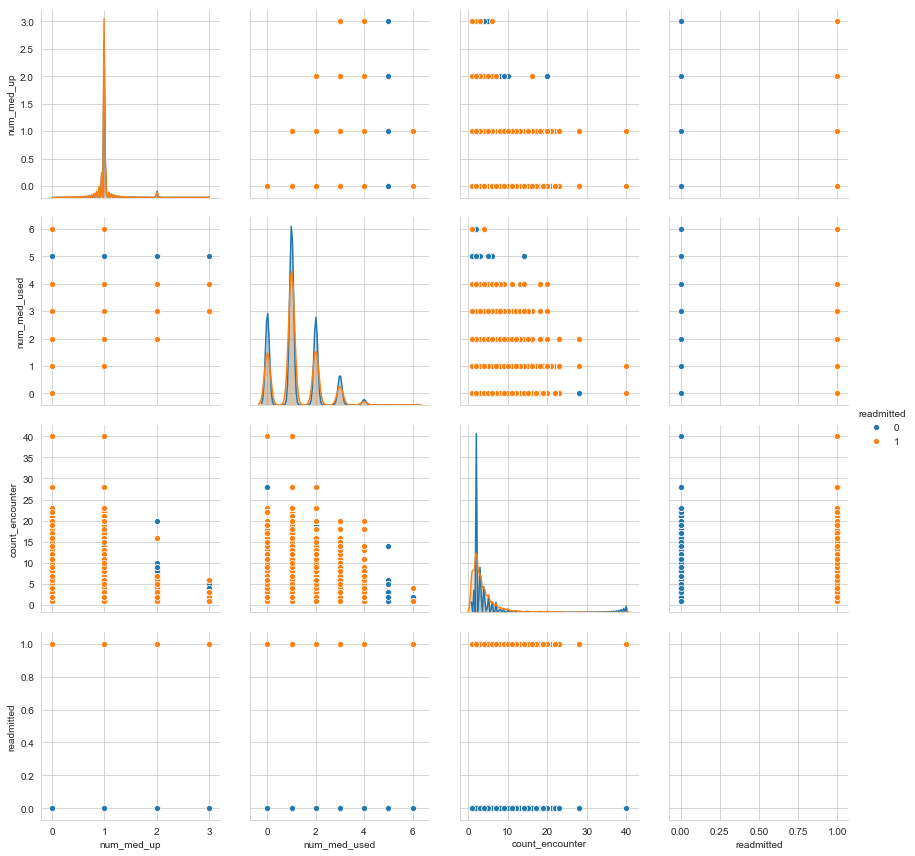

In [68]:
df_1 = df[['num_med_up',
 'num_med_used',
 'count_encounter',
 'gender','readmitted']]
sns.set_style("whitegrid");
sns.pairplot(df_1, hue="readmitted", size=3);
plt.show()

#### Not much help from here.

### 'Age' vs 'Insulin'

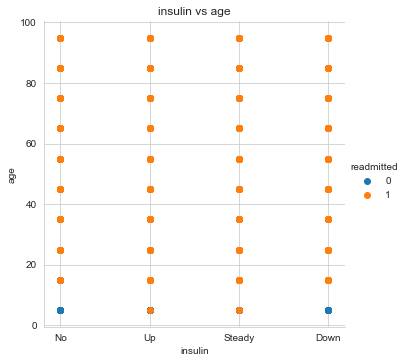

In [71]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'insulin','age').add_legend()
plt.title('insulin vs age', loc = 'center')
plt.show()

#### Not much help from here.

### 'race' vs 'Insulin'

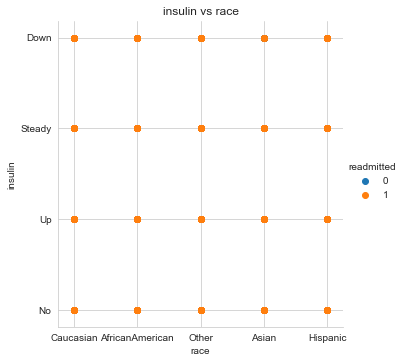

In [73]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'race','insulin').add_legend()
plt.title('insulin vs race', loc = 'center')
plt.show()

### 'age' vs 'num_lab_procedures'

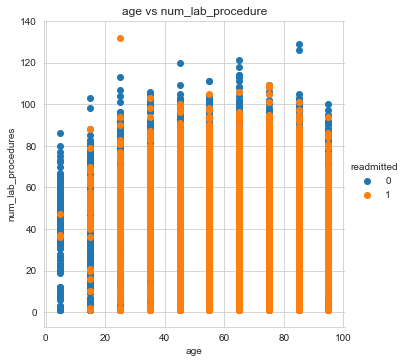

In [74]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'age','num_lab_procedures').add_legend()
plt.title('age vs num_lab_procedure', loc = 'center')
plt.show()

### 'age' vs 'num_med_up'

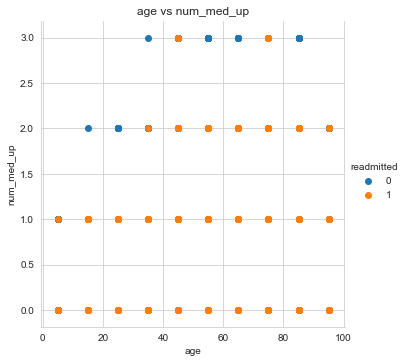

In [75]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'age','num_med_up').add_legend()
plt.title('age vs num_med_up', loc = 'center')
plt.show()

### 'age' vs 'num_med_used'

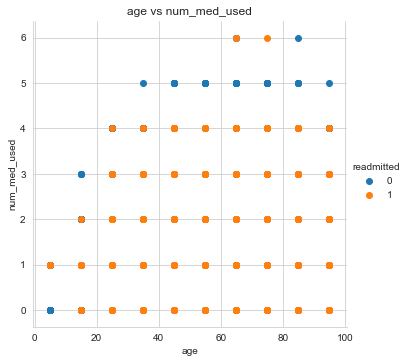

In [76]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'age','num_med_used').add_legend()
plt.title('age vs num_med_used', loc = 'center')
plt.show()

**No help from here**

### 'number_inpatient' vs 'time_in_hospital'

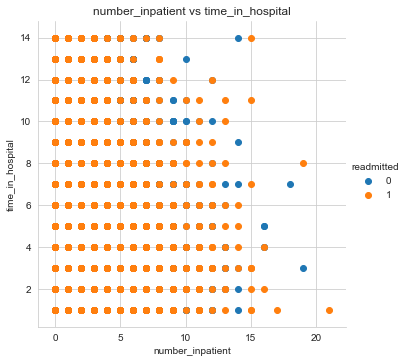

In [77]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'readmitted', height = 5).map(plt.scatter, 'number_inpatient','time_in_hospital').add_legend()
plt.title('number_inpatient vs time_in_hospital', loc = 'center')
plt.show()

**It seems that a line x+y=k will split the scatter plot in two regions where the left region will guarantee the readmission.**

### Now let us see if the length of textual description helps or not

In [80]:
df_dum['len_txt'] = df_dum['text'].apply(lambda x: len(x.split()))

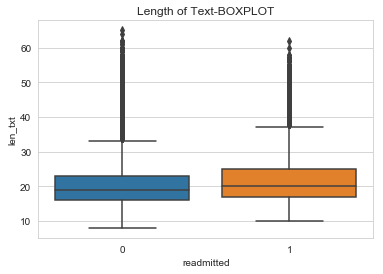

In [82]:
sns.boxplot(x='readmitted', y='len_txt', data=df_dum)
plt.title('Length of Text-BOXPLOT', loc = 'center')
plt.show()

**Those who are readmitted have slightly higher length of the text but there is not any clear sepearation.**

**So overall I got few features with whome we can do feature engineering. The new features which I should create are:**
* time_outpatient = 3* num_outpatients + 2* time_in_hospital
* proc_outpatient = 2* num_procedures + num_outpatients
* product_emerg_proc = num_emergency * procedure_per_med
* sum_time_inpatient = number_inpatient + time_in_hospital